In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sbn
import tensorflow as tf

In [4]:
# VERİYİ GETİRME KISMI
dataFrame=pd.read_excel("merc.xlsx")
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [5]:
# VERİYİ ANALİZ ETME KISMI 
# Boş veri var mı kontrol ediyoruz.
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


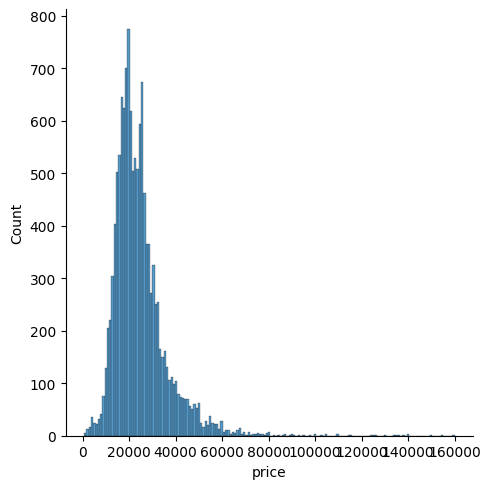

In [7]:
sbn.displot(dataFrame["price"])
# Aşağıda price'ın dağılım grafiği verilmiştir.Bu şekil normal dağılımdır.
# Farkettiysen price arttıkça satış miktarı çok azalmış.
# ve bu birkaç verinin yüksek araaba fiyatıyla regresyonu manipüle etmesini istemiyoruz.
# bu yüzden o verileri kaldırabiliriz, kaldırmayadabiliriz.

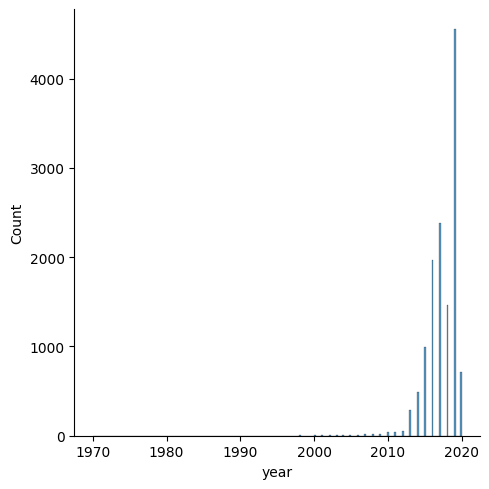

In [8]:
# yıl ile ilgili miktar grafiği çizdirip analiz edelim.
sbn.displot(dataFrame["year"])
# aşağıdaki grafikten yola çıkarak 2010 yılında sonraki yıllarda 
# üretilen arabalar daha çok satılmış.

In [9]:
# Korelasyon: İki değişken arasında ters orantı mı doğru orantı mı var onu verir.
# Korelasyon katsayısı olarak değer verir.Bu değerler -1 ile +1 arasında olur.
# r ile gösterilir.
# Verimizin tüm özelliklerinin birbirleriyle olan korelasyon ilişkisini analiz edelim.
dataFrame.corr() 

C:\Users\kadir ortaç\AppData\Local\Temp\ipykernel_6808\610906049.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [10]:
# sadece price'ın korelasyon analizi aşağıdaki gibidir.Bu korelasyon katsayılarını
# küçükten büyüğe doğru sıralamak istersek .sort_values() kullanılır.
dataFrame.corr()["price"].sort_values()

C:\Users\kadir ortaç\AppData\Local\Temp\ipykernel_6808\346408608.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [11]:
# Başta belirttiğim az miktarda olan yüksek fiyatlı arabaları silicez.
# Ama kaç adet kayıt sileceğiz? 
# Genelde verinin %1 ' ini silersek verinin yapısını bozmamış oluruz.
# 13.100 kayıt olduğu için en yüksek araba fiyatı olan ilk 131 kayıtı kaldırıp yeni
# dataframe dönüyor.
temizlenmisDf=dataFrame.sort_values("price",ascending=False).iloc[131:] 

In [12]:
temizlenmisDf

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [13]:
temizlenmisDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\kadir ortaç\AppData\Local\Temp\ipykernel_6808\1512806310.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(temizlenmisDf["price"])


<AxesSubplot: xlabel='price', ylabel='Density'>

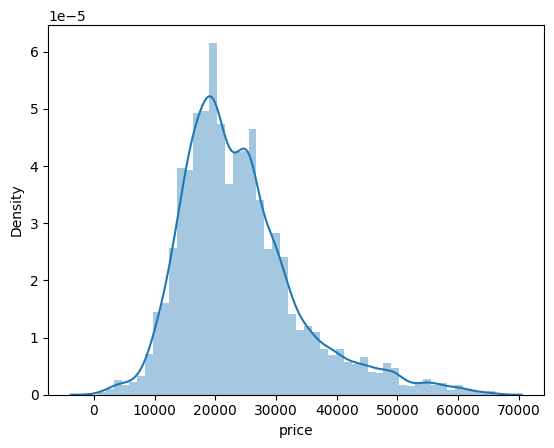

In [14]:
sbn.distplot(temizlenmisDf["price"])
# aşağıdaki grafik diğer grafiğe göre daha normal dağılıma uygun. 

In [15]:
dataFrame=temizlenmisDf
dataFrame.head()
# transmission numerik bir veri olmadığı için bu sütunu regresyona sokamayız.
# bunun için transmission sütununu sileceğiz.

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [16]:
dataFrame=dataFrame.drop("transmission",axis=1)

In [17]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [18]:
# Sıra modeli oluşturmada.
# ilk adım x ve y 'yi oluşturmak.
y=dataFrame["price"].values 
x=dataFrame.drop("price",axis=1).values

In [19]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modelim
model=Sequential()
# Hiden layerım
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
# output layer
model.add(Dense(1))
# optimizer ve loss hesaplaması için mse ekledik.
model.compile(optimizer="adam",loss="mse")
# modeli çalıştırmak için fit kullanılır.
# biz daha önce test verilerini model öğrendikten sonra doğruluyorduk
# ama burada modeli eğitirken bile x_test ve y_test i verebiliriz.
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)


Epoch 1/300
37/37 [==============================] - 2s 10ms/step - loss: 672922112.0000 - val_loss: 686275456.0000
Epoch 2/300
37/37 [==============================] - 0s 4ms/step - loss: 672886336.0000 - val_loss: 686211328.0000
Epoch 3/300
37/37 [==============================] - 0s 4ms/step - loss: 672758208.0000 - val_loss: 685973632.0000
Epoch 4/300
37/37 [==============================] - 0s 4ms/step - loss: 672296448.0000 - val_loss: 685163456.0000
Epoch 5/300
37/37 [==============================] - 0s 6ms/step - loss: 670826432.0000 - val_loss: 682720640.0000
Epoch 6/300
37/37 [==============================] - 0s 5ms/step - loss: 666869248.0000 - val_loss: 676680064.0000
Epoch 7/300
37/37 [==============================] - 0s 4ms/step - loss: 657815040.0000 - val_loss: 663655296.0000
Epoch 8/300
37/37 [==============================] - 0s 5ms/step - loss: 639628672.0000 - val_loss: 639004608.0000
Epoch 9/300
37/37 [==============================] - 0s 10ms/step - loss: 60728

<AxesSubplot: >

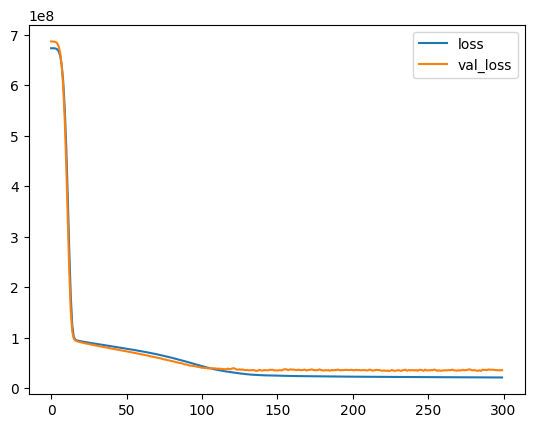

In [22]:
kayipverisi=pd.DataFrame(model.history.history)
kayipverisi.plot()
# grafiğe baktığımızda sonlara doğru birbirlerinden bir ayrılma söz konusu.
# Bunu düzeltmek için veri ön işlemede farklı paramtreleri değiştirebiliriz.

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

tahminDizisi=model.predict(x_test)

mean_absolute_error(y_test,tahminDizisi) # tahmin değerleri ile gerçek değerleri kıyasladık.
# çıkan sonuç şu; fiyatları tahmin ederkenki sapma miktarımız 4552 pound.

122/122 [==============================] - 0s 1ms/step


4478.245531324426

In [24]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [25]:
# ortalama price:24000
# sapma: 4552 
# 4552/24000= yaklaşık %19 luk bir sapma var.Bu açıkçası yüksek bir oran.
# bu oranı düşürmek için veriyi daha fazla temizleyebiliriz, epoch miktarını
#  veya step_size veya nöron sayılarını,katman sayılarını arttırabiliriz.

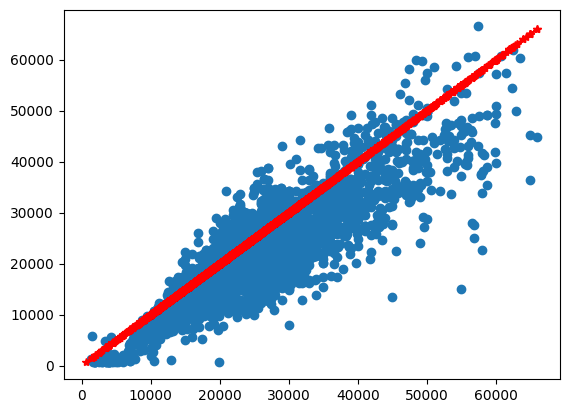

In [26]:
mp.scatter(y_test,tahminDizisi)
mp.plot(y_train,y_train,"r-*")
# amaç y_train in verilerin ortasında olması.
# burada tam ortada değil gibi yani düzgün bir lineer regresyon yok.
# bu da yukarıda saydığım sebeplerden dolayı.

In [27]:
from tensorflow.keras.models import load_model

model.save("mercedes_predict.h5")